/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

Classification Report for Logistic Regression on the Test Dataset:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18117
         1.0       0.83      0.37      0.51       556
         2.0       0.66      0.33      0.44      1448
         3.0       0.54      0.31      0.40       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21891
   macro avg       0.78      0.57      0.64     21891
weighted avg       0.90      0.91      0.90     21891

Matthews Correlation Coefficient:
0.6788214014666899
Normalized Confusion Matrix:
[[9.84434509e-01 1.65590330e-03 1.04873875e-02 9.38345201e-04
  2.48385494e-03]
 [5.79136691e-01 3.65107914e-01 5.39568345e-02 0.00000000e+00
  1.79856115e-03]
 [6.25000000e-01 8.28729282e-03 3.28038674e-01 1.86464088e-02
  2.00276243e-02]
 [6.35802469e-01 0.00000000e+00 4.93827160e-02 3.14814815e-01
  0.00000000e+00]
 [1.18781095e-01 0.00000000e+00 1.18159204

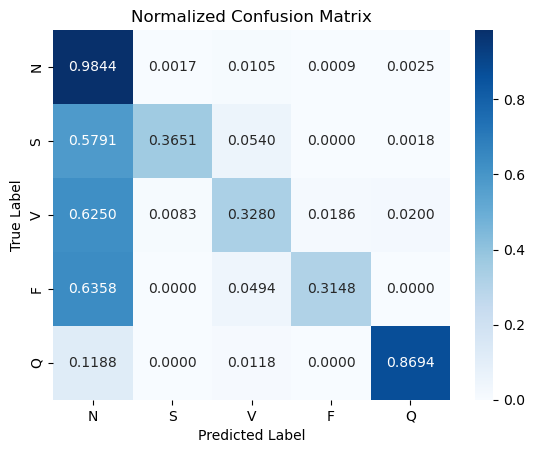

In [1]:
#Kich ban 1: Fine-tuned hyperparameter
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Load the train and test datasets using Pandas
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Split the train and test datasets into X and y
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Train the Logistic Regression model with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}
logreg_cl = LogisticRegression()
random_search = RandomizedSearchCV(logreg_cl, param_distributions=param_grid, cv=3)
random_search.fit(X_train, y_train)
best_clf = random_search.best_estimator_

# Evaluate the model on the test dataset
y_test_pred = best_clf.predict(X_test)
print('Classification Report for Logistic Regression on the Test Dataset:')
print(classification_report(y_test, y_test_pred))
print('Matthews Correlation Coefficient:')
print(matthews_corrcoef(y_test, y_test_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Map labels to their corresponding values
label_map = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
label_names = [label_map[i] for i in range(len(label_map))]

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print('Normalized Confusion Matrix:')
print(normalized_cm)

# Plot the normalized confusion matrix
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.4f')
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.show()
